# Stock Prices Prediction Using Keras Long Term Short Memory

In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the training set
data = pd.read_csv('/content/drive/MyDrive/Course Materials/aapl_from 1-1-2017 to 6-24-2022_5.csv')
data

,Date,Open,High,Low,Close,Volume
0,03/01/2017 08:30,116.100,116.2000,116.100,116.1700,8854
1,03/01/2017 08:35,116.170,116.2300,116.170,116.2200,3758
2,03/01/2017 08:40,116.230,116.2400,116.200,116.2000,11902
3,03/01/2017 08:45,116.210,116.2200,116.210,116.2200,268
4,03/01/2017 08:50,116.220,116.2500,116.070,116.1900,17702
...,...,...,...,...,...,...
106675,24/06/2022 15:35,140.205,140.4172,140.180,140.4144,745150
106676,24/06/2022 15:40,140.420,140.6000,140.410,140.5800,1058976
106677,24/06/2022 15:45,140.575,140.6900,140.420,140.4750,1065038
106678,24/06/2022 15:50,140.470,141.2100,140.465,141.1450,2939247


In [ ]:
from scipy.stats import linregress
def slope_reg(arr):
  y = np.array(arr)
  x = np.arange(len(y))
  slope, intercept, r_value, p_value, std_err = linregress(x,y)
  return slope

data["Date"] = pd.to_datetime(data['Date'],format="%d/%m/%Y %H:%M")
data['year'] = data["Date"].dt.year
data['month'] = data["Date"].dt.month
data['day'] = data["Date"].dt.day
data['hour'] = data["Date"].dt.hour
data['minute'] = data["Date"].dt.minute
data['sma10'] = data['Close'].rolling(10).mean()
data['sma20'] = data['Close'].rolling(20).mean()
data['sma50'] = data['Close'].rolling(50).mean()
data['sma120'] = data['Close'].rolling(120).mean()
data['SMA_30'] = data['Close'].rolling(window = 30).mean()
data['SMA_50'] = data['Close'].rolling(window = 50).mean()
data['SMA_150'] = data['Close'].rolling(window = 150).mean()
data['SMA_200'] = data['Close'].rolling(window = 200).mean()
data['SMA_slope_200'] = data['SMA_200'].rolling(window = 20).apply(slope_reg)
data['SMA_slope_30'] = data['SMA_30'].rolling(window = 20).apply(slope_reg)
data['Criterial1'] = (data['Close'] > data['SMA_150']) & (data['Close'] > data['SMA_200'])
data['Criterial2'] = (data['SMA_150'] > data['SMA_200'])
data['Criterial3'] = data['SMA_200']> 0.0
data['Criterial4'] = (data['SMA_50'] > data['SMA_150']) & (data['SMA_150'] > data['SMA_200'])
data['Criterial5'] = (data['Close'] > data['SMA_50'])
data['Criterial8'] = ((data['Close'] - data['Close'].shift(periods = 250))/ data['Close'].shift(periods = 250)) > 0.89
data['Criterial9'] = (data['Volume'] / data['Close']).rolling(window=50).mean() > 50000
data['Criterial10'] = data['Close'] >((data['Close']).rolling(window = 5).mean()+(data['Close']).rolling(window = 5).mean())/3
data['Criterial11'] = (data['Close'].rolling(window = 10).max() - data['Close'].rolling(window = 10).min()) < 0.1
data['Criterial12'] = data['SMA_slope_30'] > 0
data['Criterial13'] = ((data['Close'] - data['Open']) > 0)
data['Criterial14'] = (data['Close']-data['Open'])/(data['High']-data['Low']) > 0.7

data

,Date,Open,High,Low,Close,Volume,year,month,day,hour,...,Criterial3,Criterial4,Criterial5,Criterial8,Criterial9,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14
0,2017-01-03 08:30:00,116.100,116.2000,116.100,116.1700,8854,2017,1,3,8,...,False,False,False,False,False,False,False,False,True,True
1,2017-01-03 08:35:00,116.170,116.2300,116.170,116.2200,3758,2017,1,3,8,...,False,False,False,False,False,False,False,False,True,True
2,2017-01-03 08:40:00,116.230,116.2400,116.200,116.2000,11902,2017,1,3,8,...,False,False,False,False,False,False,False,False,False,False
3,2017-01-03 08:45:00,116.210,116.2200,116.210,116.2200,268,2017,1,3,8,...,False,False,False,False,False,False,False,False,True,True
4,2017-01-03 08:50:00,116.220,116.2500,116.070,116.1900,17702,2017,1,3,8,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106675,2022-06-24 15:35:00,140.205,140.4172,140.180,140.4144,745150,2022,6,24,15,...,True,True,True,False,False,True,False,True,True,True
106676,2022-06-24 15:40:00,140.420,140.6000,140.410,140.5800,1058976,2022,6,24,15,...,True,True,True,False,False,True,False,True,True,True
106677,2022-06-24 15:45:00,140.575,140.6900,140.420,140.4750,1065038,2022,6,24,15,...,True,True,True,False,False,True,False,True,False,False
106678,2022-06-24 15:50:00,140.470,141.2100,140.465,141.1450,2939247,2022,6,24,15,...,True,True,True,False,False,True,False,True,True,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106680 entries, 0 to 106679
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           106680 non-null  datetime64[ns]
 1   Open           106680 non-null  float64       
 2   High           106680 non-null  float64       
 3   Low            106680 non-null  float64       
 4   Close          106680 non-null  float64       
 5   Volume         106680 non-null  int64         
 6   year           106680 non-null  int64         
 7   month          106680 non-null  int64         
 8   day            106680 non-null  int64         
 9   hour           106680 non-null  int64         
 10  minute         106680 non-null  int64         
 11  sma10          106671 non-null  float64       
 12  sma20          106661 non-null  float64       
 13  sma50          106631 non-null  float64       
 14  sma120         106561 non-null  float64       
 15  

In [ ]:
data = data.iloc[219:,:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106461 entries, 219 to 106679
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           106461 non-null  datetime64[ns]
 1   Open           106461 non-null  float64       
 2   High           106461 non-null  float64       
 3   Low            106461 non-null  float64       
 4   Close          106461 non-null  float64       
 5   Volume         106461 non-null  int64         
 6   year           106461 non-null  int64         
 7   month          106461 non-null  int64         
 8   day            106461 non-null  int64         
 9   hour           106461 non-null  int64         
 10  minute         106461 non-null  int64         
 11  sma10          106461 non-null  float64       
 12  sma20          106461 non-null  float64       
 13  sma50          106461 non-null  float64       
 14  sma120         106461 non-null  float64       
 15

In [ ]:
data.to_csv('/content/drive/MyDrive/Data Analysis/Python study/expand_aapl_from 1-1-2017 to 6-24-2022_5.csv')

NameError: ignored

In [ ]:
data['price after 30mins'] = data['Close'].shift(periods = -6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data = data.iloc[:106454,:]
data.head(20)

,Date,Open,High,Low,Close,Volume,year,month,day,hour,...,Criterial4,Criterial5,Criterial8,Criterial9,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14,price after 30mins
219,2017-01-05 13:45:00,116.5350,116.570,116.5100,116.5300,121643,2017,1,5,13,...,True,True,False,False,True,False,True,False,False,116.4800
220,2017-01-05 13:50:00,116.5231,116.550,116.5000,116.5350,60988,2017,1,5,13,...,True,True,False,False,True,False,True,True,False,116.5257
221,2017-01-05 13:55:00,116.5400,116.570,116.4800,116.4800,93668,2017,1,5,13,...,True,True,False,False,True,False,True,False,False,116.4699
222,2017-01-05 14:00:00,116.4859,116.540,116.4800,116.5400,73449,2017,1,5,14,...,True,True,False,False,True,False,True,True,True,116.4400
223,2017-01-05 14:05:00,116.5400,116.550,116.4850,116.5100,140777,2017,1,5,14,...,True,True,False,False,True,False,True,False,False,116.3850
224,2017-01-05 14:10:00,116.5150,116.570,116.5050,116.5600,108536,2017,1,5,14,...,True,True,False,False,True,False,True,True,False,116.3700
225,2017-01-05 14:15:00,116.5550,116.615,116.4500,116.4800,145278,2017,1,5,14,...,True,True,False,False,True,False,True,False,False,116.3700
226,2017-01-05 14:20:00,116.4862,116.530,116.4600,116.5257,117879,2017,1,5,14,...,True,True,False,False,True,False,True,True,False,116.3650
227,2017-01-05 14:25:00,116.5300,116.530,116.4643,116.4699,131467,2017,1,5,14,...,True,True,False,False,True,True,True,False,False,116.3200
228,2017-01-05 14:30:00,116.4650,116.475,116.4201,116.4400,100661,2017,1,5,14,...,True,True,False,False,True,False,True,False,False,116.8700


In [ ]:
data.drop(columns="Unnamed: 0",inplace=True)

KeyError: ignored

In [ ]:
data

,Date,Open,High,Low,Close,Volume,year,month,day,hour,...,Criterial4,Criterial5,Criterial8,Criterial9,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14,price after 30mins
219,2017-01-05 13:45:00,116.5350,116.570,116.510,116.5300,121643,2017,1,5,13,...,True,True,False,False,True,False,True,False,False,116.4800
220,2017-01-05 13:50:00,116.5231,116.550,116.500,116.5350,60988,2017,1,5,13,...,True,True,False,False,True,False,True,True,False,116.5257
221,2017-01-05 13:55:00,116.5400,116.570,116.480,116.4800,93668,2017,1,5,13,...,True,True,False,False,True,False,True,False,False,116.4699
222,2017-01-05 14:00:00,116.4859,116.540,116.480,116.5400,73449,2017,1,5,14,...,True,True,False,False,True,False,True,True,True,116.4400
223,2017-01-05 14:05:00,116.5400,116.550,116.485,116.5100,140777,2017,1,5,14,...,True,True,False,False,True,False,True,False,False,116.3850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106668,2022-06-24 15:00:00,140.4450,140.470,140.285,140.3250,476186,2022,6,24,15,...,True,True,False,False,True,False,False,False,False,140.2001
106669,2022-06-24 15:05:00,140.3234,140.370,140.210,140.2276,426118,2022,6,24,15,...,True,True,False,False,True,False,True,False,False,140.4144
106670,2022-06-24 15:10:00,140.2300,140.260,140.040,140.1927,591174,2022,6,24,15,...,True,True,False,False,True,False,True,False,False,140.5800
106671,2022-06-24 15:15:00,140.2000,140.425,140.190,140.3350,637370,2022,6,24,15,...,True,True,False,False,True,False,True,True,False,140.4750


In [ ]:
# number of training record
no_train_records = 78235

df_date = data[["Date"]]
# X_train
df_train = data.iloc[:no_train_records,1:33]

# y_train
y_tr = data.iloc[:no_train_records,33:]

# X_test
df_test = data.iloc[no_train_records:,1:33]

# y_test
y_te = data.iloc[no_train_records:,33:]

# reset_index is to make sure the df_test data frame start from row 0, instead of row 78235
df_test.reset_index(inplace=True) 


In [ ]:
y_te

,price after 30mins
78454,128.5992
78455,128.3150
78456,127.7999
78457,128.0000
78458,127.5600
...,...
106668,140.2001
106669,140.4144
106670,140.5800
106671,140.4750


In [ ]:
y_tr

,price after 30mins
219,116.4800
220,116.5257
221,116.4699
222,116.4400
223,116.3850
...,...
78449,129.4050
78450,129.2500
78451,129.2750
78452,129.1200


In [ ]:
from sklearn.preprocessing import StandardScaler

sc1, sc2 = StandardScaler(), StandardScaler()

df_train_scaled = sc1.fit_transform(df_train)
print(df_train_scaled.shape)

df_train_scaled_y = sc2.fit_transform(y_tr[['price after 30mins']])
print(df_train_scaled_y.shape)

(78235, 32)
(78235, 1)


In [ ]:
# Creating a data structure with 14 timesteps and 1 output
steps = 14

X_train = []
y_train = []

for i in range(steps,no_train_records):
  X_train.append(df_train_scaled[i-steps:i])
  y_train.append(df_train_scaled_y[i][0])

X_train, y_train = np.array(X_train), np.array(y_train)
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (78221, 14, 32)
y_train (78221,)


In [ ]:
y_train

array([-1.18482644, -1.18316753, -1.18309841, ..., -1.00891311,
       -1.01105586, -1.0134751 ])

In [ ]:
X_train_shape = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_train_shape.shape

(78221, 14, 32)

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
X_train_shape.shape[1]

14

In [ ]:
# Initialising the RNN
regressor = Sequential()
# units : 50, 100, 200, 256, 512, 1024
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_shape.shape[1], 32)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'Adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train_shape, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
1223/1223 [==============================] - 95s 62ms/step - loss: 0.0271
Epoch 2/50
1223/1223 [==============================] - 69s 56ms/step - loss: 0.0143
Epoch 3/50
1223/1223 [==============================] - 68s 55ms/step - loss: 0.0125
Epoch 4/50
1223/1223 [==============================] - 66s 54ms/step - loss: 0.0107
Epoch 5/50
1223/1223 [==============================] - 67s 54ms/step - loss: 0.0103
Epoch 6/50
1223/1223 [==============================] - 66s 54ms/step - loss: 0.0101
Epoch 7/50
1223/1223 [==============================] - 74s 61ms/step - loss: 0.0090
Epoch 8/50
1223/1223 [==============================] - 69s 56ms/step - loss: 0.0079
Epoch 9/50
1223/1223 [==============================] - 69s 57ms/step - loss: 0.0088
Epoch 10/50
1223/1223 [==============================] - 69s 56ms/step - loss: 0.0091
Epoch 11/50
1223/1223 [==============================] - 66s 54ms/step - loss: 0.0082
Epoch 12/50
1223/1223 [==============================] - 66s 54

In [ ]:
df_train_last14 = df_train.iloc[-14:]

full_df = pd.concat((df_train_last14,df_test),axis=0)

print(full_df.shape)
print(full_df.head())

(28233, 33)
           Open      High     Low     Close   Volume  year  month  day  hour  \
78440  130.3900  130.4000  130.01  130.0300   816365  2021      1    6    12   
78441  130.0300  130.1289  129.93  130.0100   770413  2021      1    6    12   
78442  130.0100  130.0800  129.91  129.9150   704214  2021      1    6    12   
78443  129.9199  130.1700  129.88  130.1297  1022823  2021      1    6    12   
78444  130.1399  130.1900  129.99  130.0100   606472  2021      1    6    12   

       minute  ...  Criterial4  Criterial5  Criterial8  Criterial9  \
78440      35  ...       False        True       False       False   
78441      40  ...       False        True       False       False   
78442      45  ...       False        True       False       False   
78443      50  ...       False        True       False       False   
78444      55  ...       False        True       False       False   

       Criterial10  Criterial11  Criterial12  Criterial13  Criterial14  index  
78440 

In [ ]:
df_test

,index,Open,High,Low,Close,Volume,year,month,day,hour,...,Criterial3,Criterial4,Criterial5,Criterial8,Criterial9,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14
0,78454,129.5300,129.560,129.390,129.4250,874869,2021,1,6,13,...,True,False,False,False,False,True,False,True,False,False
1,78455,129.4300,129.500,129.275,129.4050,572273,2021,1,6,13,...,True,False,False,False,False,True,False,True,False,False
2,78456,129.4000,129.435,129.215,129.2500,537464,2021,1,6,13,...,True,False,False,False,False,True,False,True,False,False
3,78457,129.2550,129.450,129.200,129.2750,652557,2021,1,6,14,...,True,False,False,False,False,True,False,True,True,False
4,78458,129.2710,129.385,129.115,129.1200,769752,2021,1,6,14,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28214,106668,140.4450,140.470,140.285,140.3250,476186,2022,6,24,15,...,True,True,True,False,False,True,False,False,False,False
28215,106669,140.3234,140.370,140.210,140.2276,426118,2022,6,24,15,...,True,True,True,False,False,True,False,True,False,False
28216,106670,140.2300,140.260,140.040,140.1927,591174,2022,6,24,15,...,True,True,True,False,False,True,False,True,False,False
28217,106671,140.2000,140.425,140.190,140.3350,637370,2022,6,24,15,...,True,True,True,False,False,True,False,True,True,False


In [ ]:
full_df.drop(columns = ['index'], inplace=True)
full_df.head()

,Open,High,Low,Close,Volume,year,month,day,hour,minute,...,Criterial3,Criterial4,Criterial5,Criterial8,Criterial9,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14
78440,130.3900,130.4000,130.01,130.0300,816365,2021,1,6,12,35,...,True,False,True,False,False,True,False,True,False,False
78441,130.0300,130.1289,129.93,130.0100,770413,2021,1,6,12,40,...,True,False,True,False,False,True,False,True,False,False
78442,130.0100,130.0800,129.91,129.9150,704214,2021,1,6,12,45,...,True,False,True,False,False,True,False,True,False,False
78443,129.9199,130.1700,129.88,130.1297,1022823,2021,1,6,12,50,...,True,False,True,False,False,True,False,True,True,True
78444,130.1399,130.1900,129.99,130.0100,606472,2021,1,6,12,55,...,True,False,True,False,False,True,False,True,False,False


In [ ]:
full_df = sc1.transform(full_df)
full_df.shape

(28233, 32)

In [ ]:
full_df

array([[-0.9934856 , -0.99486818, -0.99717636, ...,  0.90790833,
        -0.99679685, -0.37116714],
       [-0.99846245, -0.99861049, -0.99828393, ...,  0.90790833,
        -0.99679685, -0.37116714],
       [-0.99873895, -0.99928551, -0.99856083, ...,  0.90790833,
        -0.99679685, -0.37116714],
       ...,
       [-0.85745154, -0.85875912, -0.85831452, ...,  0.90790833,
        -0.99679685, -0.37116714],
       [-0.85786628, -0.85648143, -0.85623782, ...,  0.90790833,
         1.00321345, -0.37116714],
       [-0.85599996, -0.85565318, -0.85429957, ...,  0.90790833,
         1.00321345, -0.37116714]])

In [ ]:
X_train_shape_pred = []

for i in range(steps,full_df.shape[0]):
  X_train_shape_pred.append(full_df[i-steps:i])
  
X_train_shape_pred = np.array(X_train_shape_pred)

print("X_train_shape_pred", X_train_shape_pred.shape)


X_train_shape_pred (28219, 14, 32)


In [ ]:
ytest = regressor.predict(X_train_shape_pred)

y_final_pred = sc2.inverse_transform(ytest)
y_final_pred

array([[128.64812],
       [128.81245],
       [128.38516],
       ...,
       [138.5504 ],
       [138.6721 ],
       [139.18736]], dtype=float32)

In [ ]:
len(ytest)

28219

In [ ]:
len(y_final_pred)

28219

In [ ]:
final_pred = pd.DataFrame(y_final_pred)
final_pred.columns = ["final_pred"]
final_pred

,final_pred
0,128.648117
1,128.812454
2,128.385162
3,127.985077
4,127.980507
...,...
28214,138.145065
28215,138.399170
28216,138.550400
28217,138.672104


In [ ]:
full_final = pd.concat((final_pred,df_test),axis=1)

full_final

,final_pred,index,Open,High,Low,Close,Volume,year,month,day,...,Criterial3,Criterial4,Criterial5,Criterial8,Criterial9,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14
0,128.648117,78454,129.5300,129.560,129.390,129.4250,874869,2021,1,6,...,True,False,False,False,False,True,False,True,False,False
1,128.812454,78455,129.4300,129.500,129.275,129.4050,572273,2021,1,6,...,True,False,False,False,False,True,False,True,False,False
2,128.385162,78456,129.4000,129.435,129.215,129.2500,537464,2021,1,6,...,True,False,False,False,False,True,False,True,False,False
3,127.985077,78457,129.2550,129.450,129.200,129.2750,652557,2021,1,6,...,True,False,False,False,False,True,False,True,True,False
4,127.980507,78458,129.2710,129.385,129.115,129.1200,769752,2021,1,6,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28214,138.145065,106668,140.4450,140.470,140.285,140.3250,476186,2022,6,24,...,True,True,True,False,False,True,False,False,False,False
28215,138.399170,106669,140.3234,140.370,140.210,140.2276,426118,2022,6,24,...,True,True,True,False,False,True,False,True,False,False
28216,138.550400,106670,140.2300,140.260,140.040,140.1927,591174,2022,6,24,...,True,True,True,False,False,True,False,True,False,False
28217,138.672104,106671,140.2000,140.425,140.190,140.3350,637370,2022,6,24,...,True,True,True,False,False,True,False,True,True,False


In [ ]:
full_final['price after 30mins'] = full_final['Close'].shift(periods = -6)
full_final['diff'] = full_final['final_pred'] - full_final['price after 30mins']

In [ ]:
full_final['price after 30mins']

0        128.5992
1        128.3150
2        127.7999
3        128.0000
4        127.5600
           ...   
28214         NaN
28215         NaN
28216         NaN
28217         NaN
28218         NaN
Name: price after 30mins, Length: 28219, dtype: float64

In [ ]:
full_final.to_csv('/content/drive/MyDrive/Course Materials/full_final.csv')

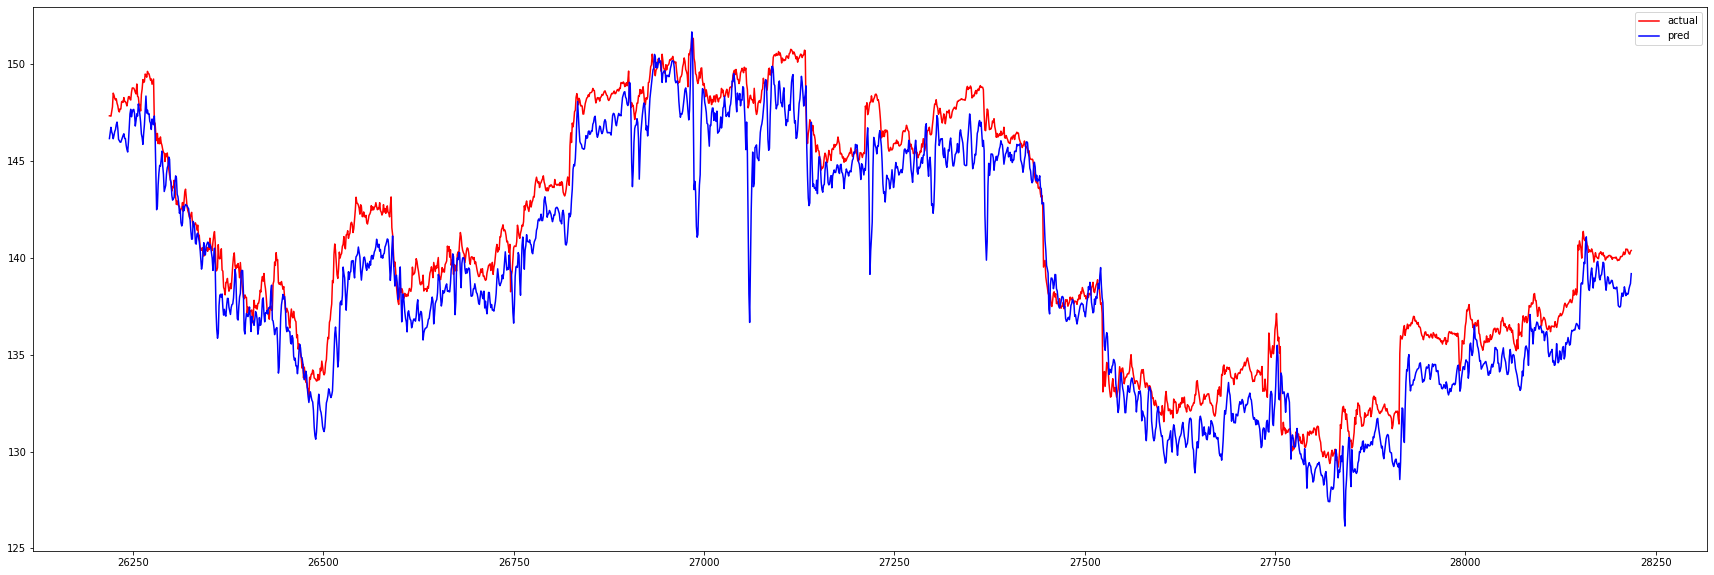

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(full_final["Close"][-2000:],label="actual", color="red")
plt.plot(full_final["final_pred"][-2000:],label="pred", color="blue")

plt.legend()

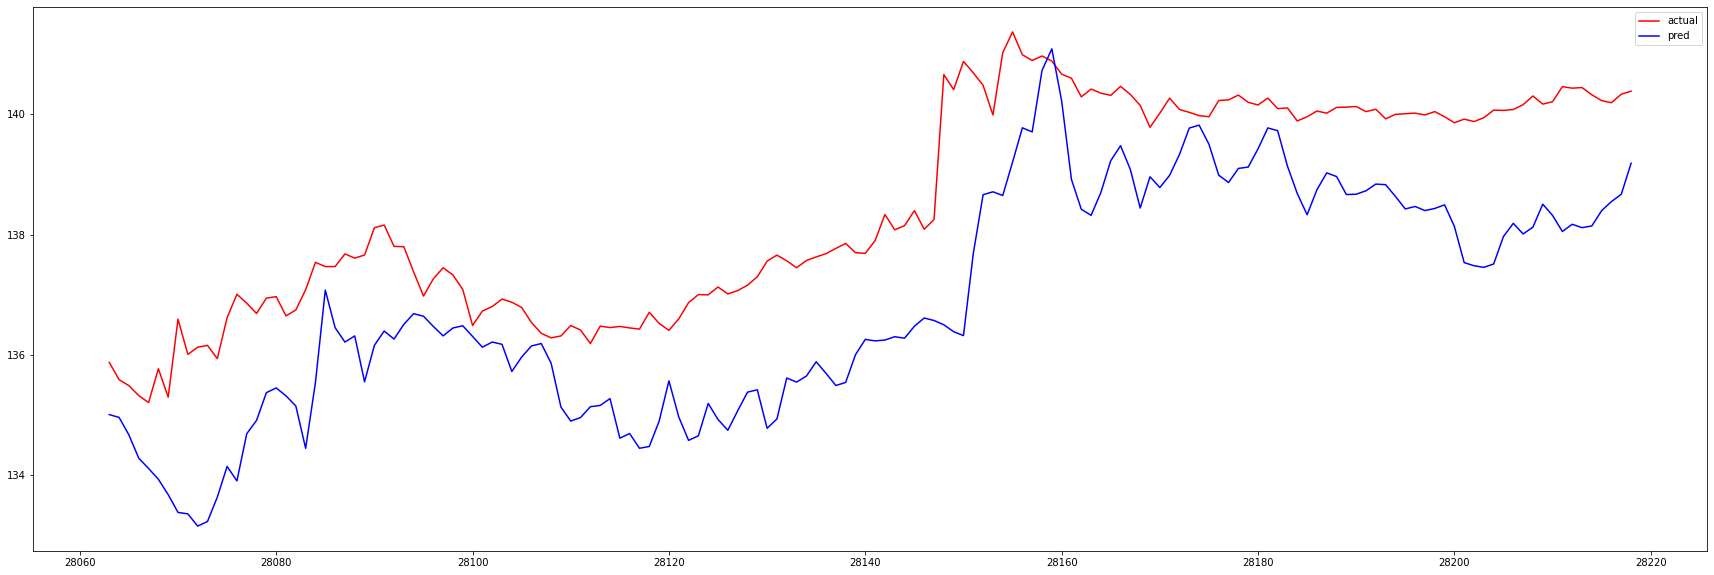

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(full_final["Close"][-156:],label="actual", color="red")
plt.plot(full_final["final_pred"][-156:],label="pred", color="blue")

plt.legend()

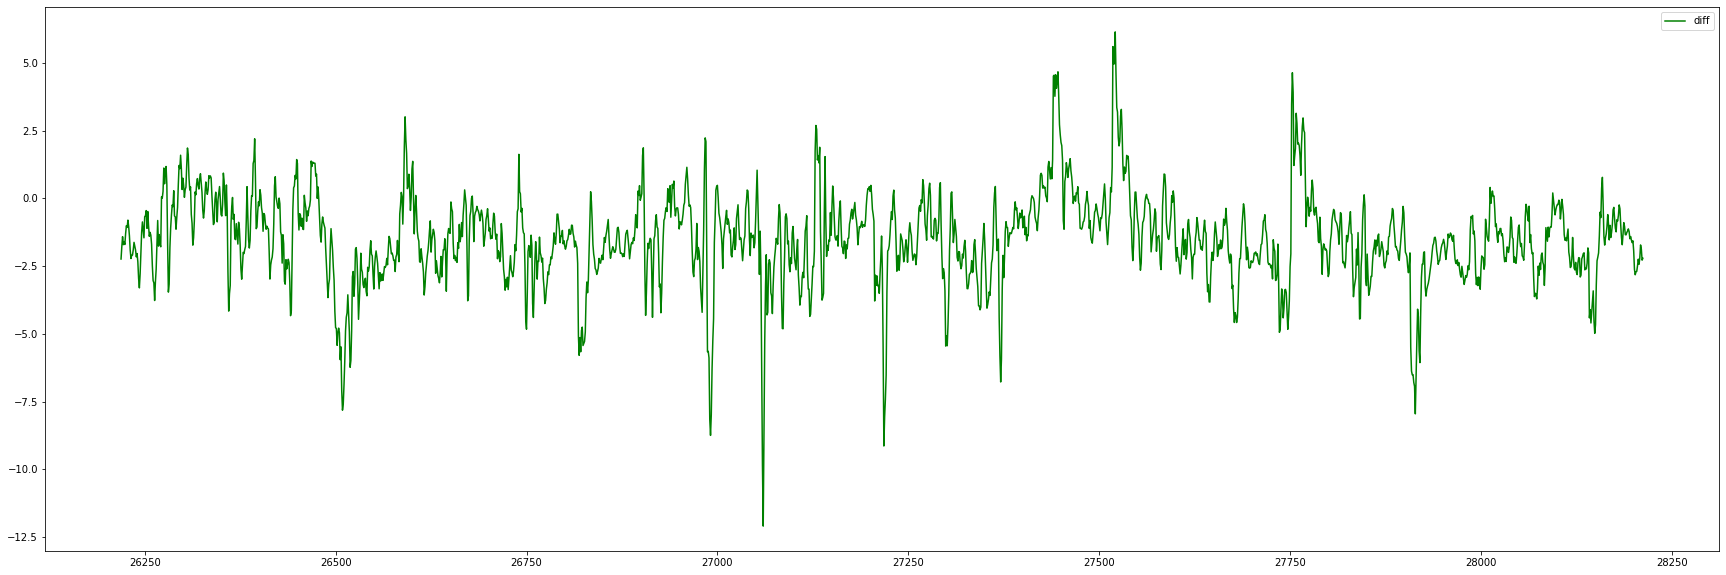

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(full_final["diff"][-2000:],label="diff", color="green")
plt.legend()

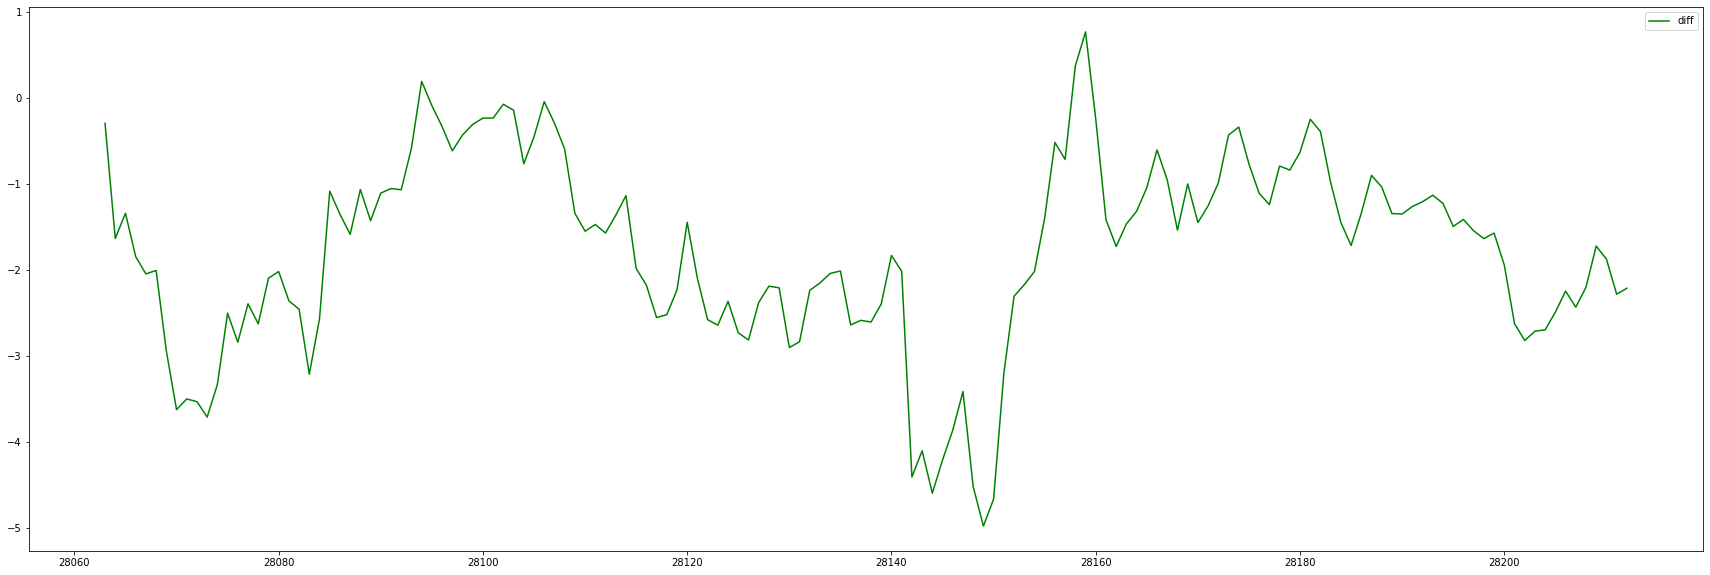

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(full_final["diff"][-156:],label="diff", color="green")
plt.legend()

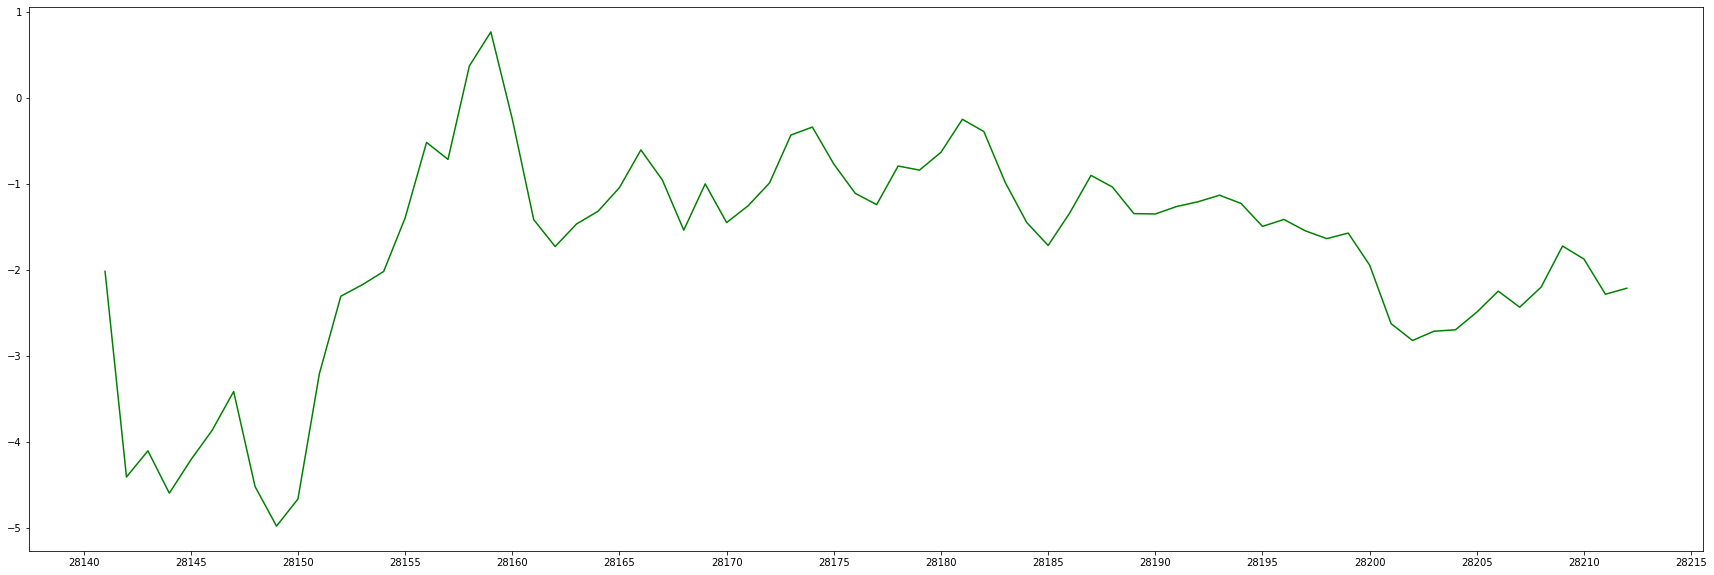

28219


In [ ]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(30,10))

plt.plot(full_final["diff"][-78:],label="diff", color="green")

plt.xticks(range(28140,28220,5))
plt.show()
print(len(full_final["diff"]))

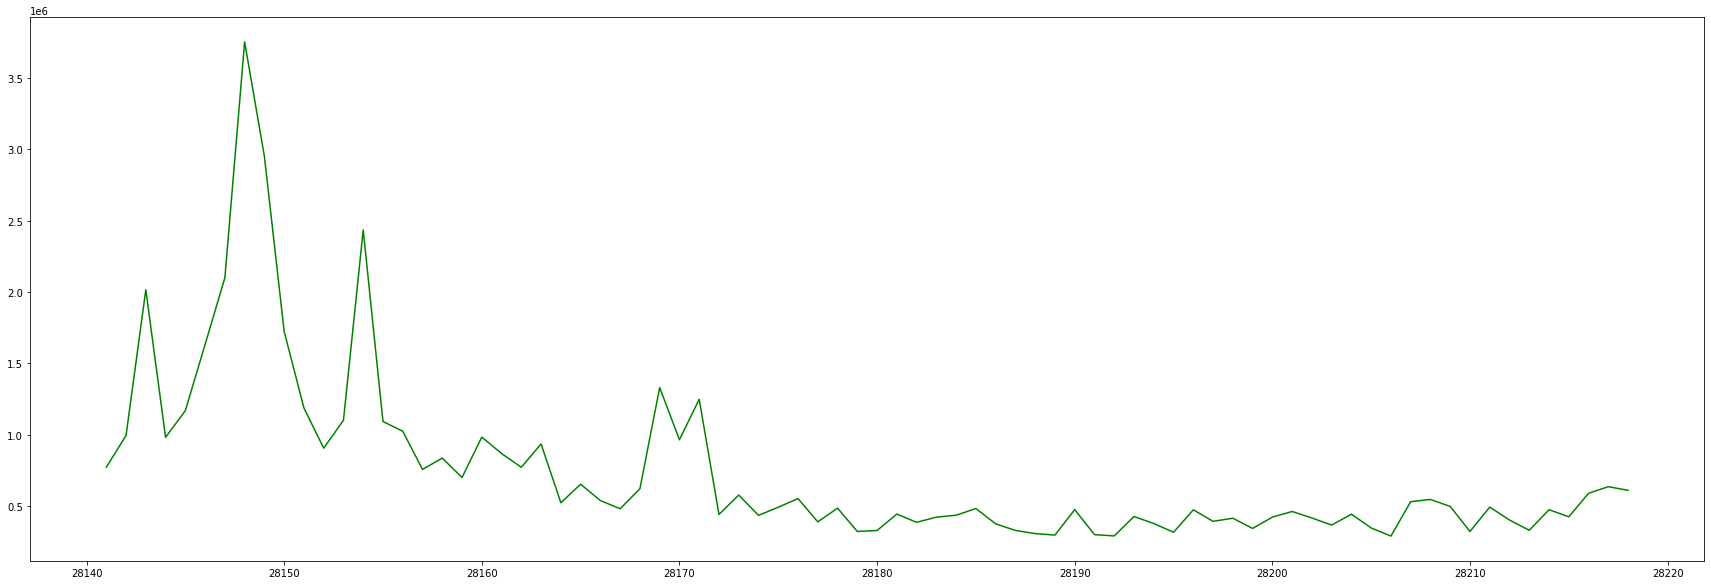

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["Volume"][-78:],label="diff", color="green")

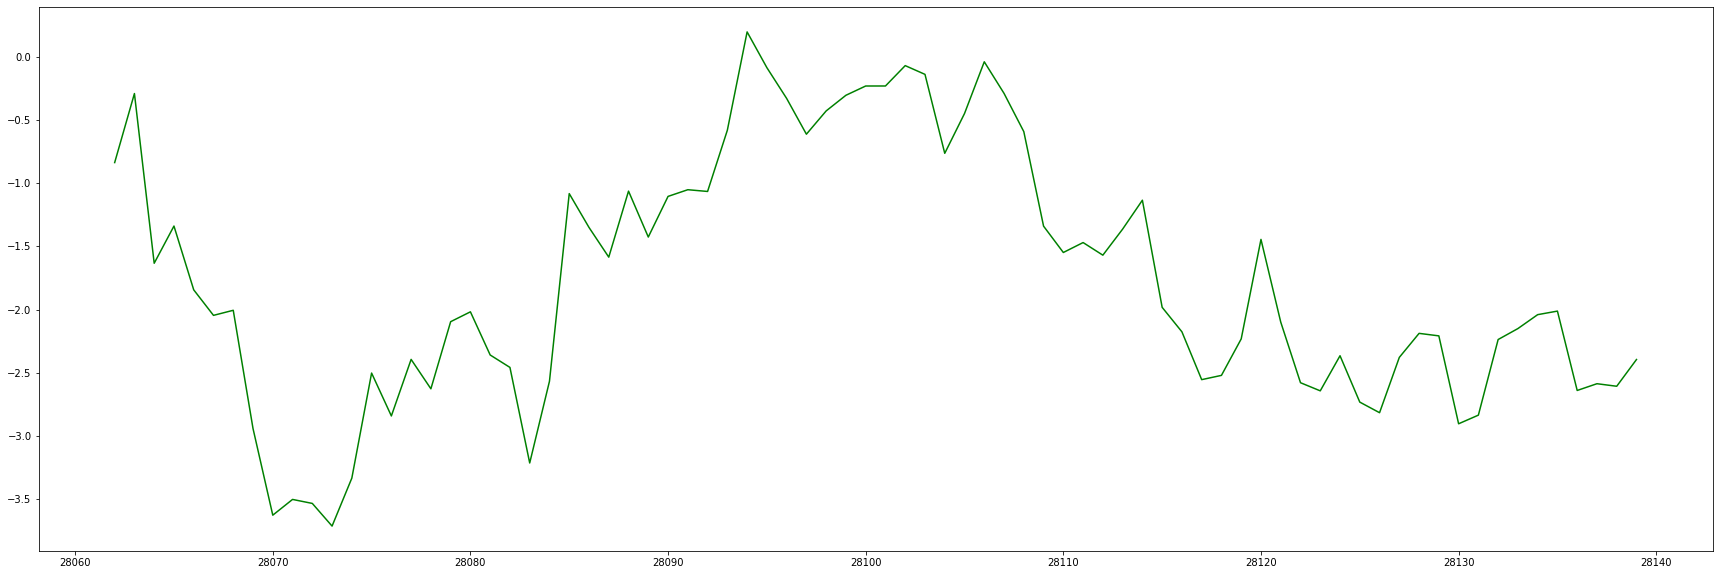

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["diff"][28062:28140],label="diff", color="green")

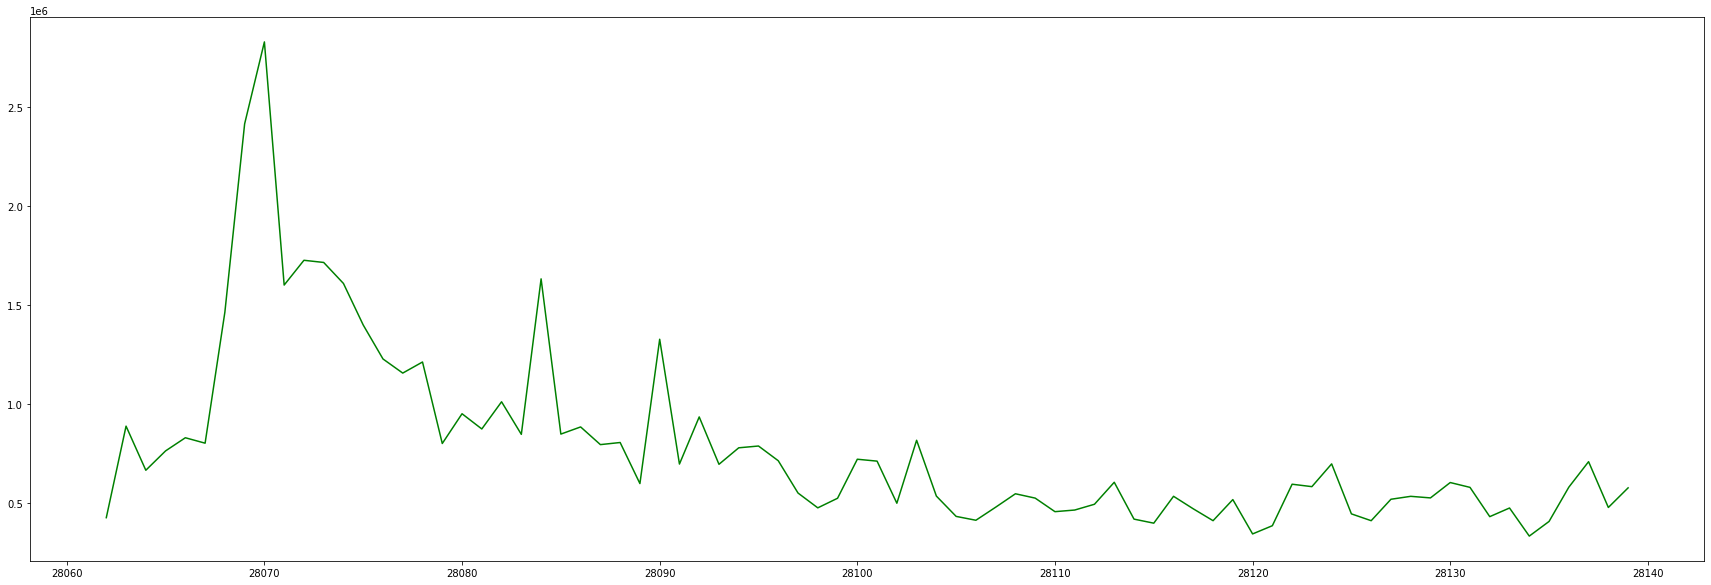

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["Volume"][28062:28140],label="diff", color="green")

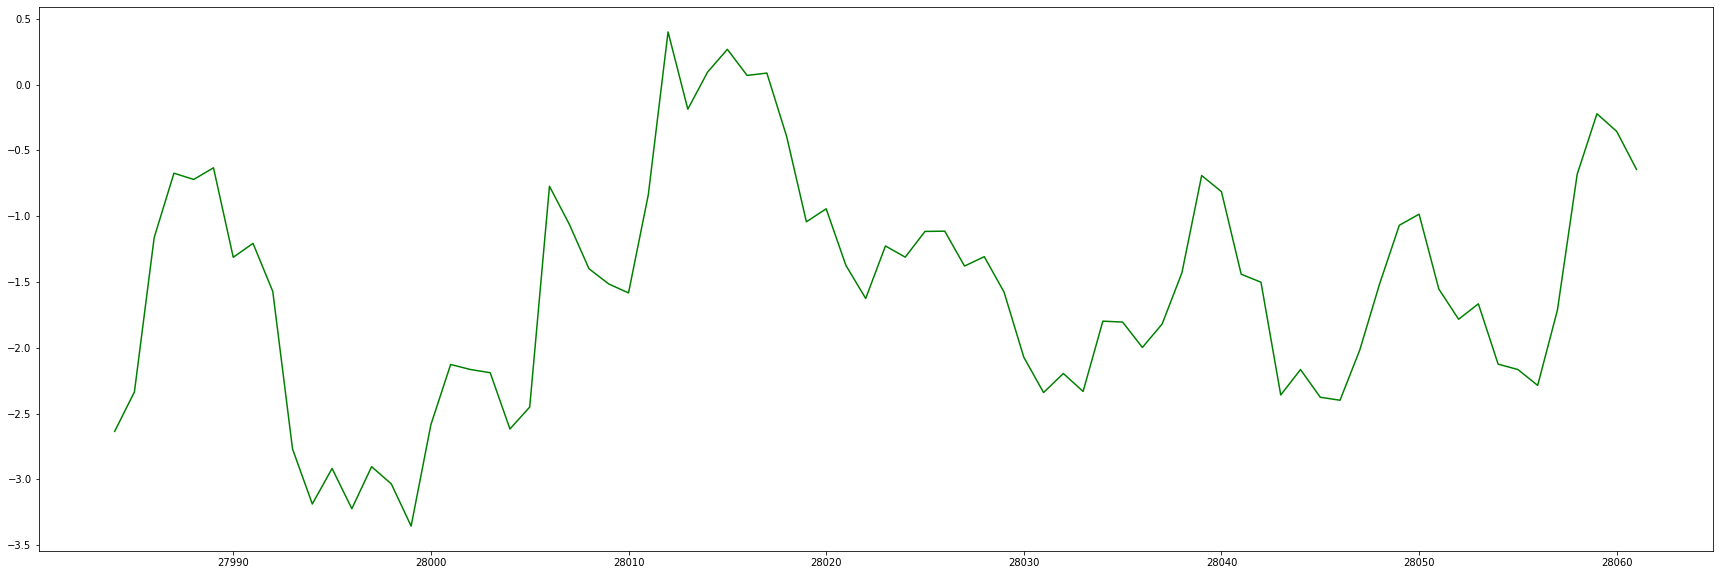

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["diff"][27984:28062],label="diff", color="green")

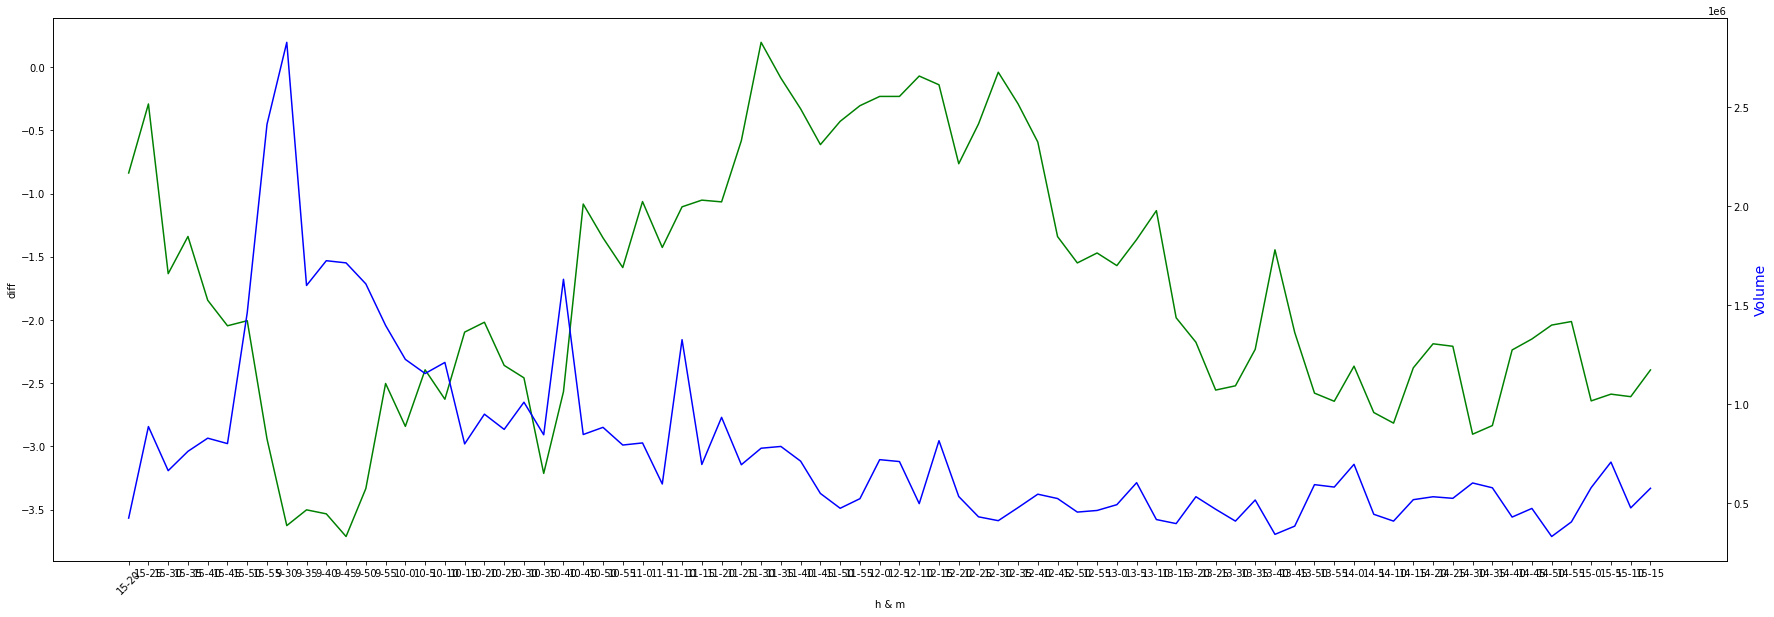

In [ ]:
full_final["h & m"] = full_final["hour"].astype(str) + "-" + full_final["minute"].astype(str)

a = 28140
c = 1
b = 28140 - (78*c)

fig,ax=plt.subplots(figsize=(30,10))
ax.plot(full_final["h & m"][b:a], full_final["diff"][b:a],color="green")
ax.set_xlabel("h & m")
ax.set_xticklabels(["h & m"],rotation=45)
ax.set_ylabel("diff")
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(full_final["h & m"][b:a],full_final["Volume"][b:a],color="blue")
ax2.set_ylabel("Volume",color="blue",fontsize=14)


plt.show()


In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["Volume"][27984:28062],label="diff", color="green")

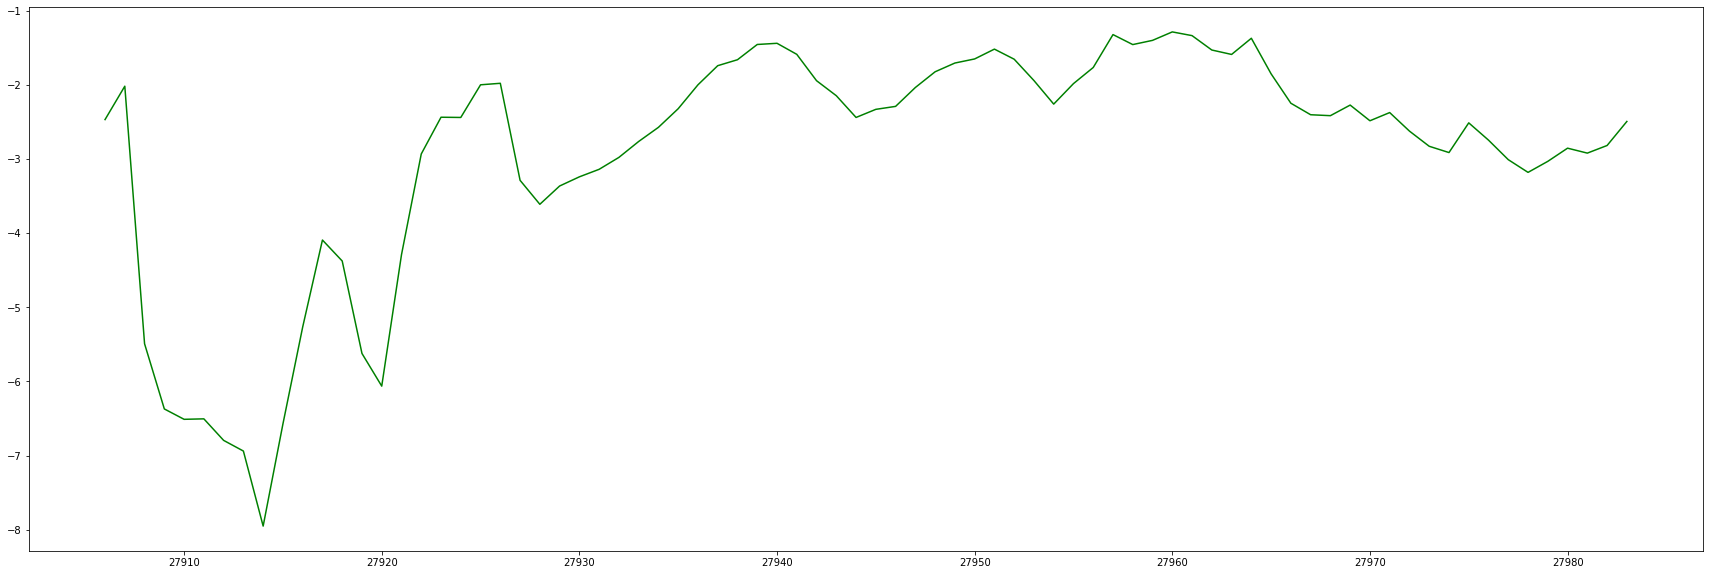

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["diff"][27906:27984],label="diff", color="green")

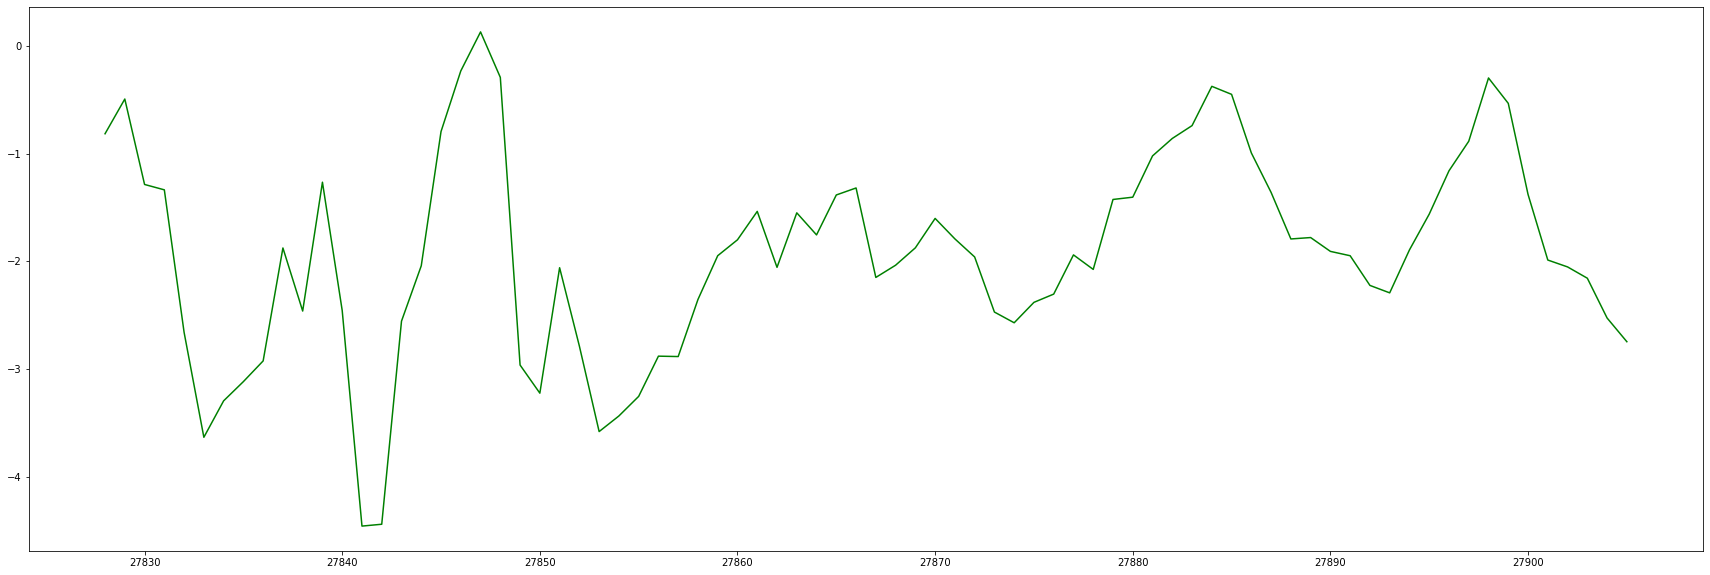

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["diff"][27828:27906],label="diff", color="green")

In [ ]:
print(type(full_final['diff'][:]))

<class 'pandas.core.series.Series'>


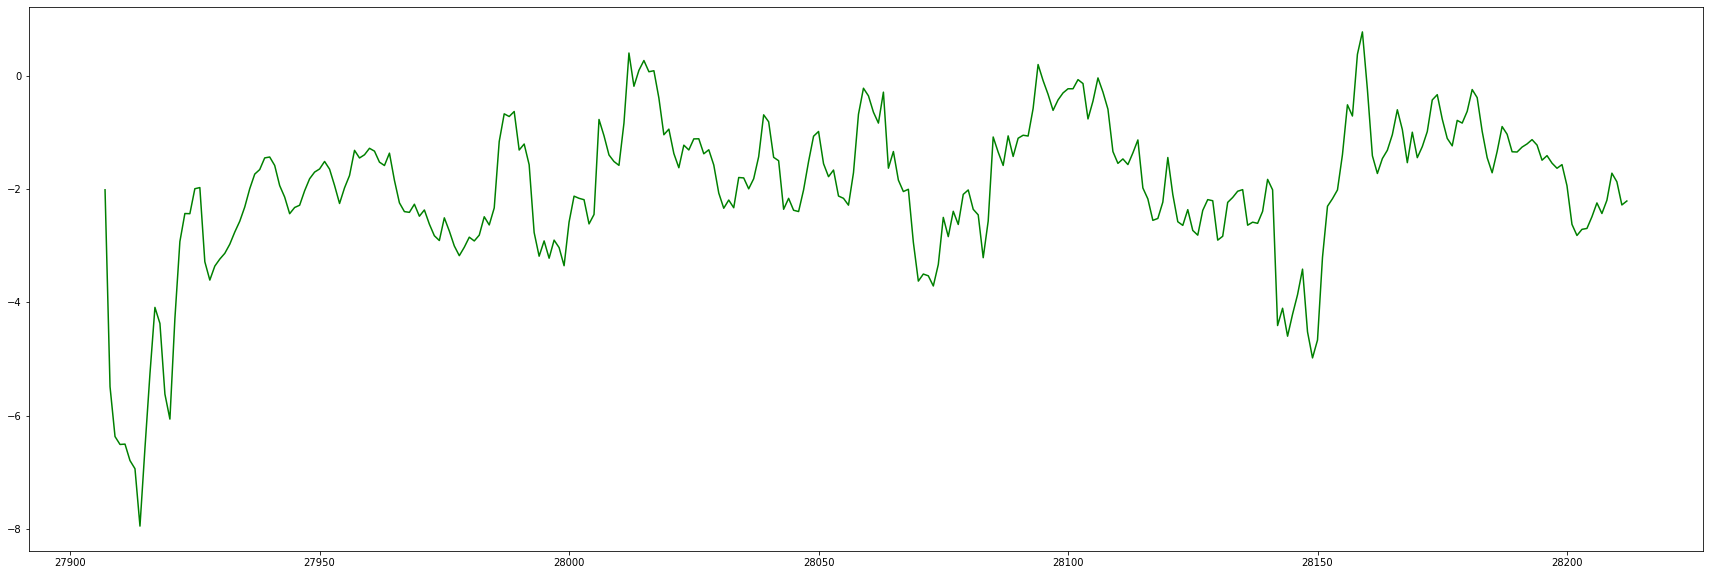

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["diff"][-312:],label="diff", color="green")

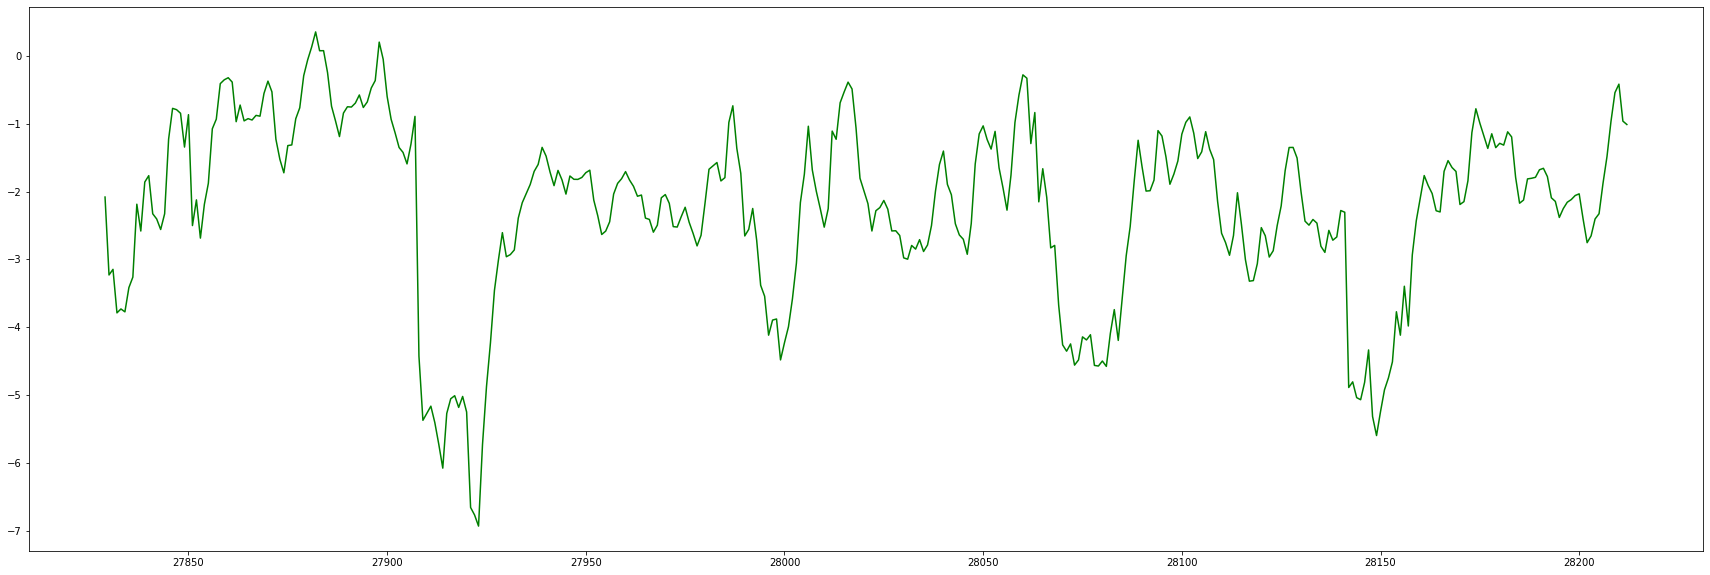

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["diff"][-390:],label="diff", color="green")

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(full_final["diff"][-390:],label="diff", color="green")

In [ ]:
len(full_final["diff"][:])

28219

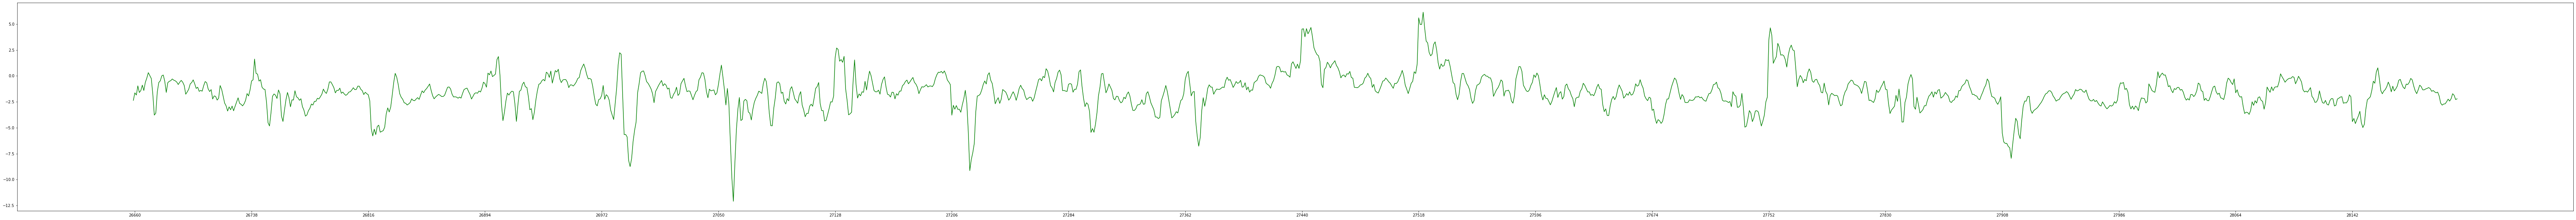

28219


In [ ]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(120,10))

plt.plot(full_final["diff"][-1560:],label="diff", color="green")

plt.xticks(range(26660,28220,78))
plt.show()
print(len(full_final["diff"]))

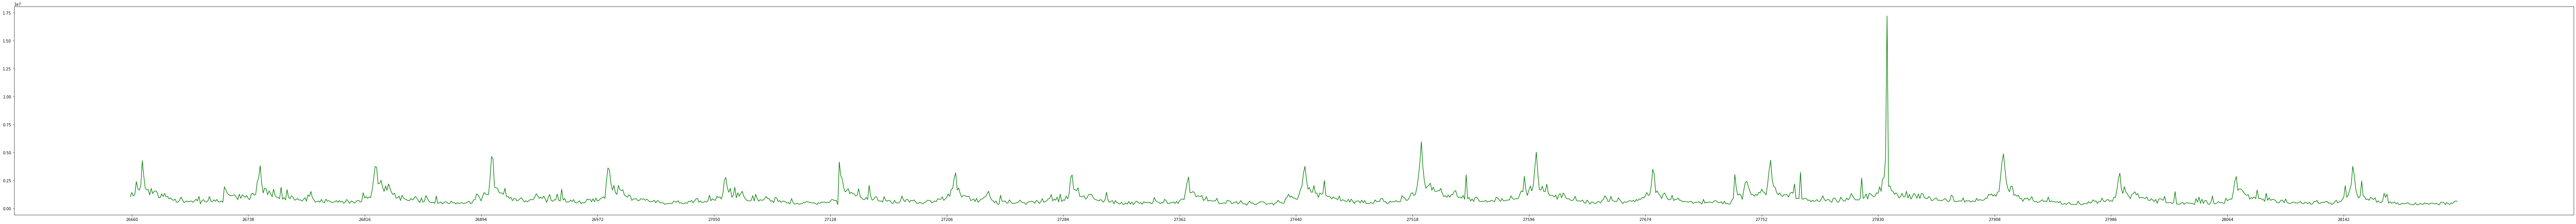

28219


In [ ]:
plt.figure(figsize=(120,10))

plt.plot(full_final["Volume"][-1560:],label="Volume", color="green")

plt.xticks(range(26660,28220,78))
plt.show()
print(len(full_final["diff"]))

In [ ]:
regressor.save('/content/drive/MyDrive/Course Materials/seq model (for close price)_expand_aapl_from 1-1-2017 to 6-24-2022_5.h5')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            16600     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 14, 50)            2

In [ ]:
from tensorflow import keras
model_test = keras.models.load_model('/content/drive/MyDrive/Course Materials/seq model (for close price)_expand_aapl_from 1-1-2017 to 6-24-2022_5.h5')

model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            16600     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 14, 50)            2

In [ ]:
full_final.head(30)

,final_pred,index,Open,High,Low,Close,Volume,year,month,day,...,Criterial5,Criterial8,Criterial9,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14,price after 30mins,diff
0,128.648117,78454,129.5300,129.560,129.3900,129.4250,874869,2021,1,6,...,False,False,False,True,False,True,False,False,128.5992,0.048917
1,128.812454,78455,129.4300,129.500,129.2750,129.4050,572273,2021,1,6,...,False,False,False,True,False,True,False,False,128.3150,0.497454
2,128.385162,78456,129.4000,129.435,129.2150,129.2500,537464,2021,1,6,...,False,False,False,True,False,True,False,False,127.7999,0.585262
3,127.985077,78457,129.2550,129.450,129.2000,129.2750,652557,2021,1,6,...,False,False,False,True,False,True,True,False,128.0000,-0.014923
4,127.980507,78458,129.2710,129.385,129.1150,129.1200,769752,2021,1,6,...,False,False,False,True,False,True,False,False,127.5600,0.420507
5,127.678352,78459,129.1200,129.170,128.9442,128.9450,1019638,2021,1,6,...,False,False,False,True,False,False,False,False,127.8792,-0.200848
6,127.575661,78460,128.9450,129.030,128.5100,128.5992,1675173,2021,1,6,...,False,False,False,True,False,False,False,False,127.1750,0.400661
7,127.395981,78461,128.5975,128.720,128.2610,128.3150,1395794,2021,1,6,...,False,False,False,True,False,False,False,False,127.6400,-0.244019
8,127.335716,78462,128.3103,128.375,127.7500,127.7999,3056549,2021,1,6,...,False,False,False,True,False,False,False,False,127.9399,-0.604184
9,127.261879,78463,127.7900,128.220,127.7000,128.0000,2207055,2021,1,6,...,False,False,False,True,False,False,True,False,128.4400,-1.178121
